In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from models import *

In [54]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')

b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.2-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')

c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.5-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')



In [55]:
print('test accuracy:', a['test_acc_array'][-1], b['test_acc_array'][-1], c['test_acc_array'][-1], '\n')
print('train loss:', a['train_loss_array'][-1], b['train_loss_array'][-1], c['train_loss_array'][-1])

a['test_acc_array']

test accuracy: 93.78 93.55 93.92 

train loss: 0.001282942761658736 0.0015553143849034252 0.001474252116391221


array([12.36, 22.25, 26.04, 34.59, 39.22, 62.68, 66.1 , 67.64, 71.6 ,
       68.18, 69.65, 67.47, 65.81, 76.05, 76.44, 72.21, 77.25, 79.45,
       75.64, 79.09, 77.54, 77.92, 77.77, 79.03, 80.85, 77.69, 82.65,
       81.63, 74.83, 68.76, 81.46, 80.41, 71.22, 79.91, 76.23, 80.68,
       82.64, 75.75, 80.89, 81.41, 78.66, 81.28, 82.27, 79.37, 81.4 ,
       81.73, 70.95, 81.17, 83.93, 79.09, 80.27, 82.24, 79.54, 83.94,
       81.62, 80.24, 80.65, 76.89, 82.75, 78.96, 81.72, 82.41, 80.35,
       80.06, 73.72, 81.36, 82.77, 85.02, 82.  , 82.23, 83.02, 83.76,
       84.18, 81.64, 84.82, 82.61, 83.73, 79.87, 84.65, 83.25, 82.17,
       83.4 , 84.29, 82.84, 78.34, 84.68, 85.96, 81.72, 86.43, 81.22,
       85.56, 86.32, 84.17, 85.57, 86.27, 82.72, 87.09, 87.56, 85.31,
       84.41, 83.68, 85.28, 85.24, 84.74, 85.98, 88.31, 84.82, 87.29,
       88.24, 87.53, 86.11, 88.06, 88.04, 86.84, 86.81, 87.94, 87.29,
       87.56, 85.92, 89.37, 88.2 , 88.69, 88.58, 88.86, 89.89, 86.71,
       87.02, 89.38,

In [56]:
# Loading the nets

net1 = VGG('VGG19')
net1.load_state_dict(a['net'], strict=False)
net1.eval()

net2 = VGG('VGG19')
net2.load_state_dict(b['net'], strict=False)
net2.eval()

net3 = VGG('VGG19')
net3.load_state_dict(c['net'], strict=False)
net3.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [57]:
# # Loading the nets

# net1 = Linear_mnist()
# net1.load_state_dict(a['net'], strict=False)
# net1.eval()

# net2 = Linear_mnist()
# net2.load_state_dict(aaa['net'], strict=False)
# net2.eval()

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(2.4559)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(2.4365)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(2.2621)


torch.Size([1, 3, 32, 32])

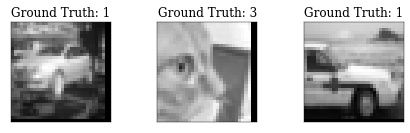

In [58]:
# loading the data

stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
crop=32
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
input_dim = [1,3,32,32]
num_classes = 10

transform_train = transforms.Compose([
    transforms.RandomCrop(crop, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(*stats),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, 128, shuffle=True)

# plot 6 examples of data point
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()

In [59]:
# c = {} #the difference network
# d = 0
# for i in a['net']:
#     c[i] = a['net'][i]-b['net'][i]
#     d = d + (torch.norm(c[i].type(torch.FloatTensor)))**2

# d

# # net_diff = VGG('VGG19')
# net_diff.load_state_dict(c, strict=False)
# net_diff.eval()

In [60]:
Jac_1 = {}
Jac_2 = {}
Jac_3 = {}
# Jac_diff = {}

for i in range(20):
    Jac_1[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_2[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_3[i] = torch.autograd.functional.jacobian(net3, example_data[i:i+1,:,:,:], create_graph = True)
#     Jac_diff[i] = torch.autograd.functional.jacobian(net_diff, example_data[i:i+1,:,:,:], create_graph = True)

In [61]:
v_3 = np.zeros(20)
v_4 = np.zeros(20)


for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))), '\n')
    v_3[i] = torch.norm((Jac_1[i])) / torch.norm((Jac_2[i]))

for i in range(20):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_1[i])) / torch.norm((Jac_3[i]))), '\n')
    v_4[i] = torch.norm((Jac_1[i])) / torch.norm((Jac_3[i]))


on the datapoint 0 we have (1/2) tensor(1.0043, grad_fn=<DivBackward0>) 

on the datapoint 1 we have (1/2) tensor(1.0156, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(0.9209, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(0.9782, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(1.0072, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(0.9900, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(0.9538, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(1.0127, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(0.8384, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(0.9687, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(0.9531, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(0.9550, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(1.0541, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) t

In [62]:
for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-2)/1', torch.norm(Jac_1[i]-Jac_2[i])/torch.norm(Jac_1[i]))
#     print('on the datapoint', i, 'the difference of the two neural nets is', torch.norm(net_diff(example_data[i:i+1,:,:,:]))/torch.norm(net1(example_data[i:i+1,:,:,:])))

for i in range(20):
    print('on the datapoint', i, 'the difference of the two Jacobians is (1-3)/1', torch.norm(Jac_1[i]-Jac_3[i])/torch.norm(Jac_1[i]))


on the datapoint 0 the difference of the two Jacobians is (1-2)/1 tensor(1.4082, grad_fn=<DivBackward0>)
on the datapoint 1 the difference of the two Jacobians is (1-2)/1 tensor(1.4038, grad_fn=<DivBackward0>)
on the datapoint 2 the difference of the two Jacobians is (1-2)/1 tensor(1.4721, grad_fn=<DivBackward0>)
on the datapoint 3 the difference of the two Jacobians is (1-2)/1 tensor(1.4243, grad_fn=<DivBackward0>)
on the datapoint 4 the difference of the two Jacobians is (1-2)/1 tensor(1.4087, grad_fn=<DivBackward0>)
on the datapoint 5 the difference of the two Jacobians is (1-2)/1 tensor(1.4298, grad_fn=<DivBackward0>)
on the datapoint 6 the difference of the two Jacobians is (1-2)/1 tensor(1.4532, grad_fn=<DivBackward0>)
on the datapoint 7 the difference of the two Jacobians is (1-2)/1 tensor(1.4101, grad_fn=<DivBackward0>)
on the datapoint 8 the difference of the two Jacobians is (1-2)/1 tensor(1.5571, grad_fn=<DivBackward0>)
on the datapoint 9 the difference of the two Jacobians 

Files already downloaded and verified
the min entry in the example 0 is tensor(-2.4291)
the max entry in the example 0 is tensor(1.1184)
the min entry in the example 1 is tensor(-2.4291)
the max entry in the example 1 is tensor(2.3590)
the min entry in the example 2 is tensor(-2.4291)
the max entry in the example 2 is tensor(2.1845)


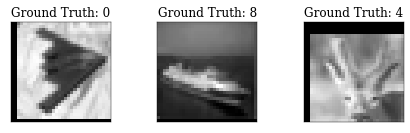

In [63]:
# loading the data - TEST


testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_train)
testloader = torch.utils.data.DataLoader(
    testset, 128, shuffle=True)

# plot 6 examples of data point
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

for i in range(3):
  print('the min entry in the example', i , 'is', torch.min(example_data[i][0]))
  print('the max entry in the example', i , 'is', torch.max(example_data[i][0]))

fig = plt.figure()
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

example_data[0:1,:,:,:].size()


Jac_4 = {}
Jac_5 = {}
Jac_6 = {}

for i in range(20):
    Jac_4[i] = torch.autograd.functional.jacobian(net1, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_5[i] = torch.autograd.functional.jacobian(net2, example_data[i:i+1,:,:,:], create_graph = True)
    Jac_6[i] = torch.autograd.functional.jacobian(net3, example_data[i:i+1,:,:,:], create_graph = True)

In [64]:
v_1 = np.zeros(20)
v_2 = np.zeros(20)

for i in range(20):
#     print('on the datapoint', i, 'the Frobenius norm of the Jacobian of the SGD-trained net is:', torch.norm((Jac_1[i]), p='fro'), 'The one of the label noised:', torch.norm((Jac_2[i])))
    print('on the datapoint', i, 'we have (1/2)', (torch.norm((Jac_4[i])) / torch.norm((Jac_5[i]))), '\n')
    
    v_1[i] = torch.norm((Jac_4[i])) / torch.norm((Jac_5[i]))

for i in range(20):
    print('on the datapoint', i, 'we have (1/3)', (torch.norm((Jac_4[i])) / torch.norm((Jac_6[i]))), '\n')
    
    v_2[i] = torch.norm((Jac_4[i])) / torch.norm((Jac_6[i]))
    


on the datapoint 0 we have (1/2) tensor(0.9736, grad_fn=<DivBackward0>) 

on the datapoint 1 we have (1/2) tensor(0.9721, grad_fn=<DivBackward0>) 

on the datapoint 2 we have (1/2) tensor(0.9544, grad_fn=<DivBackward0>) 

on the datapoint 3 we have (1/2) tensor(0.9403, grad_fn=<DivBackward0>) 

on the datapoint 4 we have (1/2) tensor(0.9571, grad_fn=<DivBackward0>) 

on the datapoint 5 we have (1/2) tensor(0.9679, grad_fn=<DivBackward0>) 

on the datapoint 6 we have (1/2) tensor(0.9294, grad_fn=<DivBackward0>) 

on the datapoint 7 we have (1/2) tensor(1.0270, grad_fn=<DivBackward0>) 

on the datapoint 8 we have (1/2) tensor(0.9860, grad_fn=<DivBackward0>) 

on the datapoint 9 we have (1/2) tensor(0.9409, grad_fn=<DivBackward0>) 

on the datapoint 10 we have (1/2) tensor(1.0589, grad_fn=<DivBackward0>) 

on the datapoint 11 we have (1/2) tensor(0.9966, grad_fn=<DivBackward0>) 

on the datapoint 12 we have (1/2) tensor(0.9318, grad_fn=<DivBackward0>) 

on the datapoint 13 we have (1/2) t

In [65]:
v_2

array([1.31191194, 1.37593746, 1.35170209, 1.31482971, 1.37552524,
       1.31177258, 1.35295355, 1.3793695 , 1.39292967, 1.32038891,
       1.34743214, 1.35088575, 1.34858453, 1.47926593, 1.38311708,
       1.30822349, 1.34075642, 1.33472991, 1.38153958, 1.3441211 ])

# Plotting the results

In [66]:
toplot = {
    'train - 0.2': {'color': 'C0'},
    'test - 0.2': { 'color': "C1"},
    'train - 0.5': {'color': 'C2'},
    'test - 0.5': { 'color': "C3"},
}
 
results = {}

for label, fields in toplot.items():
        if label == 'train - 0.2':
           # accuracy_adam = mean_ad
            results[label] = v_3
        if label == 'test - 0.2':
          #  accuracy_da = mean
            results[label] = v_1
        if label == 'train - 0.5':
           # accuracy_adam = mean_ad
            results[label] = v_4
        if label == 'test - 0.5':
          #  accuracy_da = mean
            results[label] = v_2
            
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'train - 0.2':
           # accuracy_adam = mean_ad
            accuracy[label] = ('Train loss '+ (b['train_loss_array'][-1].astype('str'))[:6])
        if label == 'test - 0.2':
          #  accuracy_da = mean
            accuracy[label] = ('Test accuracy '+str(b['best_acc']))
        if label == 'train - 0.5':
           # accuracy_adam = mean_ad
            accuracy[label] = ('Train loss '+(c['train_loss_array'][-1].astype('str'))[:6])
        if label == 'test - 0.5':
          #  accuracy_da = mean
            accuracy[label] = ('Test accuracy '+str(c['best_acc']))

In [67]:
accuracy

{'train - 0.2': 'Train loss 0.0015',
 'test - 0.2': 'Test accuracy 93.57',
 'train - 0.5': 'Train loss 0.0014',
 'test - 0.5': 'Test accuracy 94.09'}

Saved jacobian_norm_ratio_128_cifar10_1.pdf


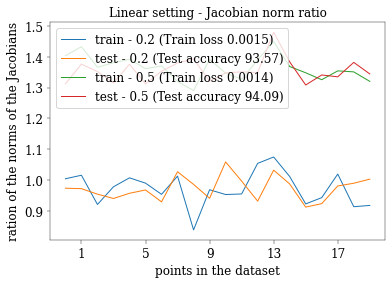

In [68]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]})"
    ax.plot(xp, arr_data, label=label)

plt.xticks(range(1,21,4))
ax.set_xlabel('points in the dataset')
ax.set_ylabel('ration of the norms of the Jacobians')
ax.set_title("Linear setting - Jacobian norm ratio")
ax.legend(loc='upper left')

fname = "jacobian_norm_ratio_128_cifar10_1.pdf"
plt.savefig(fname)
print(f"Saved {fname}")